Unnamed: 0    Generali ESG
alpha             1.592935
beta             -0.167187
gamma             -0.00049
delta             0.005427
Name: 5, dtype: object
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan na

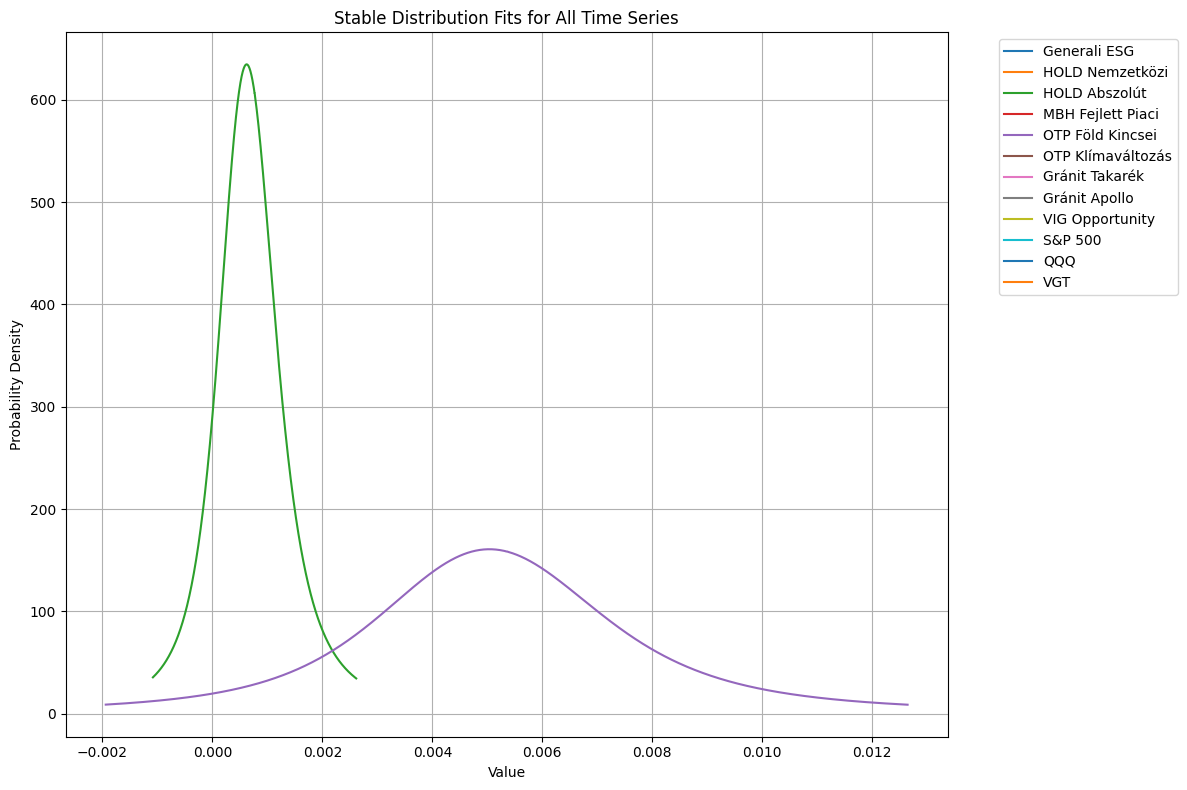

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable

df = pd.read_csv('./Clean/stable_fit.csv')
df['Params'] = df['Params'].apply(lambda x: eval(x))
params_df = pd.DataFrame(df['Params'].tolist(), columns=['alpha', 'beta', 'gamma', 'delta'])
combined_data = pd.concat([df[['Unnamed: 0']], params_df], axis=1)

plt.figure(figsize=(12, 8))
for index, row in combined_data.iterrows():
    if df.iloc[index]['Is Above 95th']:
        print(row)
        alpha, beta, gamma, delta = row['alpha'], row['beta'], row['gamma'], row['delta']
        x_shifted = np.linspace(delta - 4 * gamma, delta + 4 * gamma, 1000)
        y = levy_stable.pdf(x_shifted, alpha, beta, loc=delta, scale=gamma)
        print(y)
        plt.plot(x_shifted, y, label=row['Unnamed: 0'])

plt.title('Stable Distribution Fits for All Time Series')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
